In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [11]:
from google.colab import files
uploaded = files.upload()



Saving OnlineRetail.csv to OnlineRetail.csv


In [12]:
import os

# List files in the current directory
print(os.listdir())


['.config', 'OnlineRetail.csv', 'sample_data']


In [19]:
# Step 3: Read the file with specified encoding
try:
    df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv('OnlineRetail.csv', encoding='windows-1252')


In [20]:
data = pd.read_csv('OnlineRetail.csv',encoding = 'latin1')

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [22]:
data.shape

(499428, 8)

In [23]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [24]:
data = data.drop(['Description'],axis = 1)

In [25]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [26]:
data = data.rename(columns = {"StockCode":"SKU"})

In [27]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [28]:
data.dtypes

InvoiceNo       object
SKU             object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [29]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [30]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [31]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [32]:
data['Date'] = data['InvoiceDate'].apply(lambda x: str(x).split(" "))

In [33]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"


In [36]:
data[['date','hour']] = pd.DataFrame(data['Date'].tolist(), index = data.index)

In [37]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [38]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date                   object
hour                   object
dtype: object

In [39]:
data['date'] = pd.to_datetime(data['date'])

In [40]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [41]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date           datetime64[ns]
hour                   object
dtype: object

In [42]:
pd.DataFrame(data.isnull().sum(), columns = ['null values'])

,null values
InvoiceNo,0
SKU,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,119449
Country,0
Date,0
date,0
hour,0


In [43]:
pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,3), columns = ['null values%'])

,null values%
InvoiceNo,0.000
SKU,0.000
Quantity,0.000
InvoiceDate,0.000
UnitPrice,0.000
CustomerID,23.917
Country,0.000
Date,0.000
date,0.000
hour,0.000


In [44]:
data = data.dropna(subset = ['CustomerID'])

In [45]:
data.shape

(379979, 10)

In [46]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [47]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year

In [48]:
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day

In [49]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4


In [50]:
len(data['Month'].unique())

12

In [51]:
len(data['InvoiceNo'].unique()) #20482

20482

In [52]:
len(data['SKU'].unique())

3612

In [53]:
### revenue by month

data['revenue'] = data['UnitPrice']*data['Quantity']

In [54]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,revenue
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.5


In [55]:
data_revenue = data.groupby('Month')['revenue'].sum().reset_index()

In [56]:
data_revenue

,Month,revenue
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


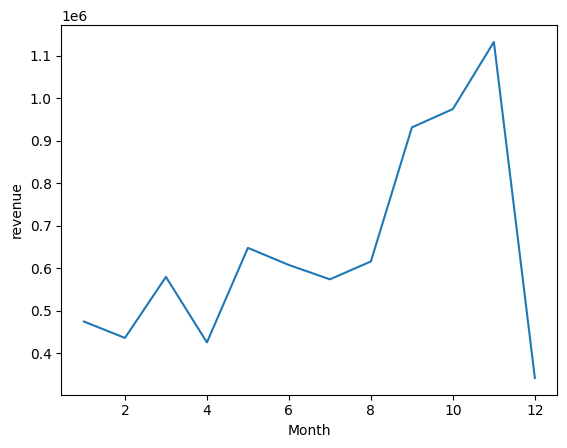

In [57]:
ax = sns.lineplot(x = 'Month', y = 'revenue', data = data_revenue, sort = False)

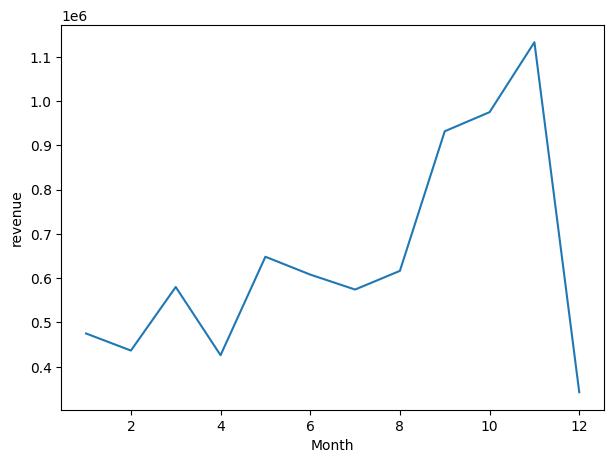

In [67]:
fig,axes = plt.subplots(figsize = (7,5))
ax = sns.lineplot(x = 'Month', y = 'revenue', data = data_revenue, sort = False)

Text(0.5, 1.0, 'Revenue per month')

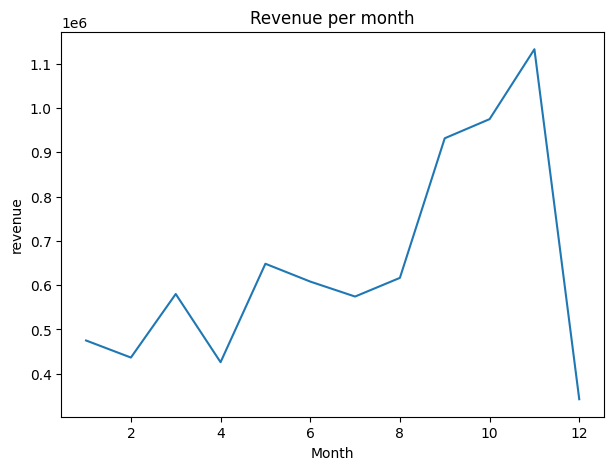

In [66]:
fig,axes = plt.subplots(figsize = (7,5))
ax = sns.lineplot(x = 'Month', y = 'revenue', data = data_revenue, sort = False)

ax.set_title('Revenue per month')

In [68]:
#monthly growth rate

In [126]:
data_revenue['MonthlyGrowth'] = data_revenue['revenue'].pct_change()

<ipython-input-126-60ef11e39cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_revenue['MonthlyGrowth'] = data_revenue['revenue'].pct_change()


In [70]:
data_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [71]:
data_revenue = data_revenue.loc[data_revenue['Month']!=12]

In [72]:
data_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [73]:
data_revenue['MonthlyGrowth'] = data_revenue['MonthlyGrowth'].fillna(0)

<ipython-input-73-16a84508339c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_revenue['MonthlyGrowth'] = data_revenue['MonthlyGrowth'].fillna(0)


In [74]:
data_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,0.000000
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


Text(0.5, 1.0, 'Monthly Growth Rate')

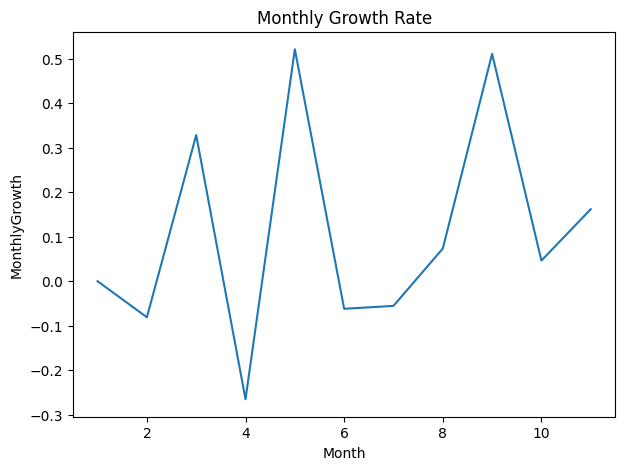

In [76]:
fig,axes = plt.subplots(figsize = (7,5))
ax = sns.lineplot(x = 'Month', y = 'MonthlyGrowth', data = data_revenue, sort = False)

ax.set_title('Monthly Growth Rate')

In [77]:
#monthly active custmers

In [78]:
data_monthly_active = data.groupby('Month')['CustomerID'].nunique().reset_index()

In [79]:
data_monthly_active

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


Text(0.5, 1.0, 'Monthly Active Customers by Month')

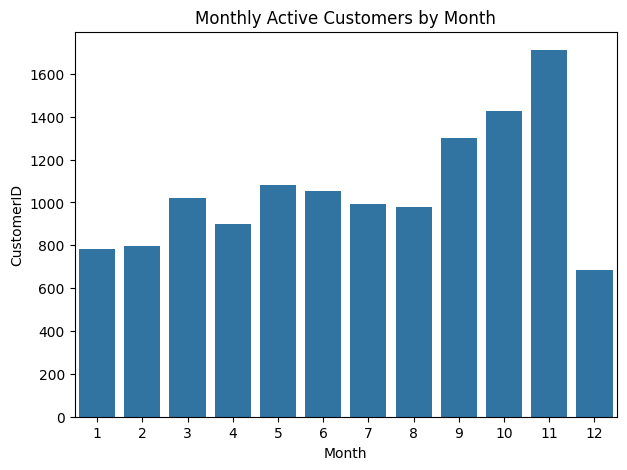

In [81]:
fig,axes = plt.subplots(figsize = (7,5))

ax = sns.barplot(x = 'Month', y = 'CustomerID', data = data_monthly_active)

ax.set_title('Monthly Active Customers by Month')

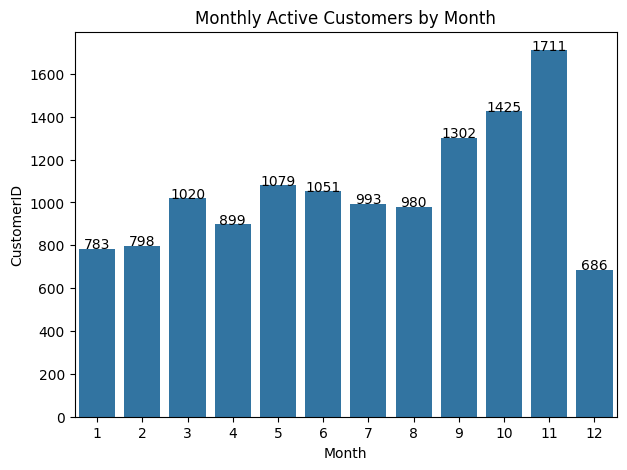

In [82]:
fig,axes = plt.subplots(figsize = (7,5))

ax = sns.barplot(x = 'Month', y = 'CustomerID', data = data_monthly_active)

ax.set_title('Monthly Active Customers by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height +0.2, ha = 'center', s= '{:.0f}'.format(height))

In [83]:
#total unique order by month

In [84]:
data_unique_order = data.groupby('Month')['InvoiceNo'].nunique().reset_index()

In [85]:
data_unique_order

,Month,InvoiceNo
0,1,1236
1,2,1202
2,3,1619
3,4,1384
4,5,1849
5,6,1707
6,7,1593
7,8,1544
8,9,2078
9,10,2263


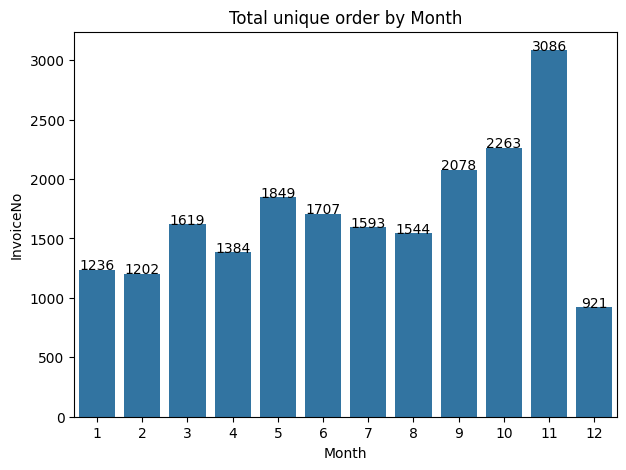

In [87]:
fig,axes = plt.subplots(figsize = (7,5))

ax = sns.barplot(x = 'Month', y = 'InvoiceNo', data = data_unique_order)

ax.set_title('Total unique order by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height +0.2, ha = 'center', s= '{:.0f}'.format(height))

In [88]:
data_order_sales = data.groupby('Month')['Quantity'].sum().reset_index()

In [89]:
data_order_sales

,Month,Quantity
0,1,269379
1,2,262833
2,3,344012
3,4,278585
4,5,367852
5,6,356922
6,7,363418
7,8,386612
8,9,537496
9,10,569666


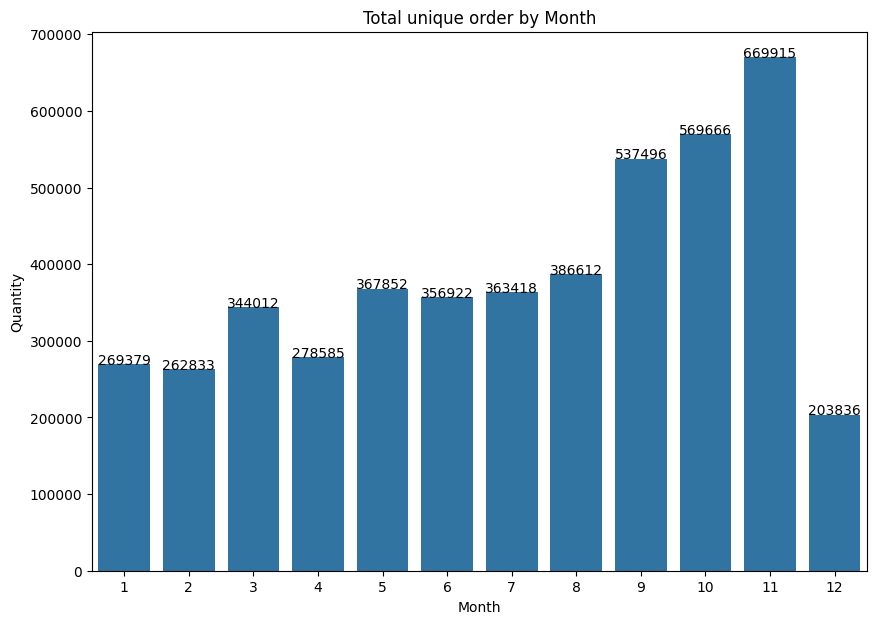

In [93]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'Quantity', data = data_order_sales)

ax.set_title('Total unique order by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height +0.2, ha = 'center', s= '{:.0f}'.format(height))

In [94]:
#average revenue

In [95]:
data_avg_revenue = data.groupby('Month')['revenue'].mean().reset_index()

In [96]:
data_avg_revenue

,Month,revenue
0,1,21.681014
1,2,21.438204
2,3,20.845540
3,4,18.365715
4,5,22.424626
5,6,21.842691
6,7,20.879881
7,8,22.282120
8,9,22.817118
9,10,19.224846


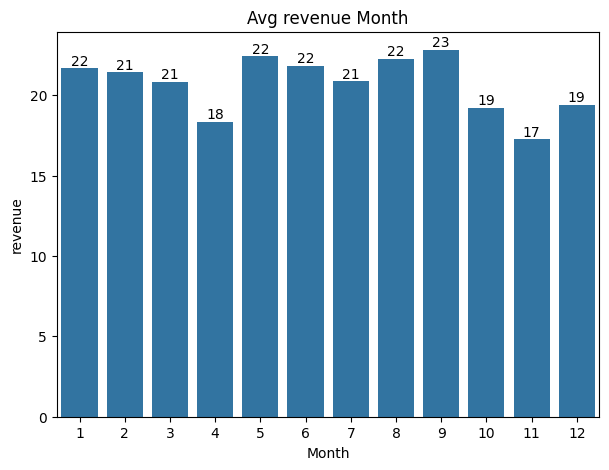

In [98]:
fig,axes = plt.subplots(figsize = (7,5))

ax = sns.barplot(x = 'Month', y = 'revenue', data = data_avg_revenue)

ax.set_title('Avg revenue Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height +0.2, ha = 'center', s= '{:.0f}'.format(height))

In [99]:
data_min_date_buy = data.groupby('CustomerID').date.min().reset_index()

In [100]:
data_min_date_buy

,CustomerID,date
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-08-05
4242,18283.0,2011-01-06


In [101]:
data_min_date_buy.columns = ['CustomerID', 'MinPurchaseDate']

In [102]:
data_min_date_buy['MinPurchaseMonth'] = data_min_date_buy['MinPurchaseDate'].map(lambda date:date.month)

In [103]:
data_min_date_buy

,CustomerID,MinPurchaseDate,MinPurchaseMonth
0,12346.0,2011-01-18,1
1,12347.0,2011-01-26,1
2,12348.0,2011-01-25,1
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2
...,...,...,...
4239,18280.0,2011-03-07,3
4240,18281.0,2011-06-12,6
4241,18282.0,2011-08-05,8
4242,18283.0,2011-01-06,1


In [104]:
data = pd.merge(data, data_min_date_buy, on = 'CustomerID')

In [105]:
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,revenue,MinPurchaseDate,MinPurchaseMonth
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.50,2011-01-04,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.50,2011-01-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,15.00,2011-12-09,12
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,24.96,2011-12-09,12


In [106]:
data['UserType'] = 'New'
data.loc[data['Month']>data['MinPurchaseMonth'],'UserType'] = 'Existing'

In [107]:
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,revenue,MinPurchaseDate,MinPurchaseMonth,UserType
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.50,2011-01-04,1,New
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.50,2011-01-04,1,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,15.00,2011-12-09,12,New
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,24.96,2011-12-09,12,New


In [108]:
data_userType_revenue = data.groupby(['Month','UserType'])['revenue'].sum().reset_index()

In [109]:
data_userType_revenue

,Month,UserType,revenue
0,1,New,475074.380
1,2,Existing,222645.040
2,2,New,213901.110
3,3,Existing,356562.750
4,3,New,223401.860
5,4,Existing,283526.090
6,4,New,142521.761
7,5,Existing,518892.810
8,5,New,129358.270
9,6,Existing,508100.200


Text(0.5, 1.0, 'Revenue for usertype')

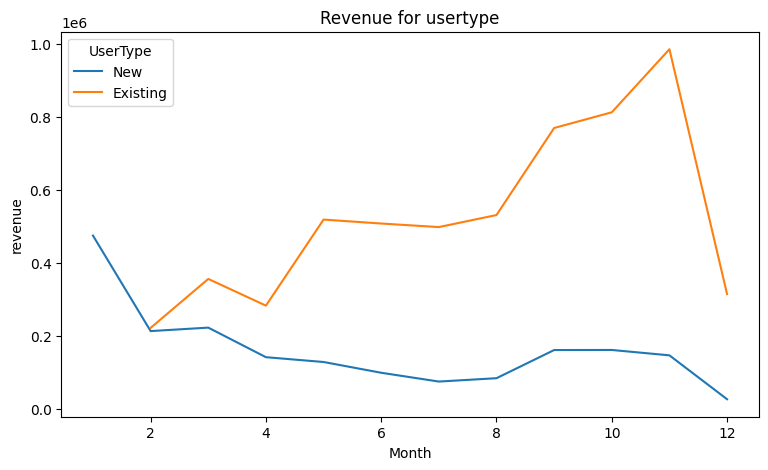

In [111]:
fig,axes = plt.subplots(figsize = (9,5))

ax = sns.lineplot(data =data_userType_revenue, x = "Month", y = "revenue", hue = "UserType" )

ax.set_title('Revenue for usertype')

In [112]:
data_user_purchase = data.groupby(['CustomerID', 'Month'])['revenue'].sum().reset_index()

In [113]:
data_user_purchase

,CustomerID,Month,revenue
0,12346.0,1,0.00
1,12347.0,1,475.39
2,12347.0,4,636.25
3,12347.0,6,382.52
4,12347.0,8,584.91
...,...,...,...
12722,18283.0,10,114.65
12723,18283.0,11,651.56
12724,18283.0,12,208.00
12725,18287.0,5,765.28


In [114]:
data_user_retention = pd.crosstab(data_user_purchase['CustomerID'],data_user_purchase['Month']).reset_index()

In [115]:
data_user_retention

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346.0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,18280.0,0,0,1,0,0,0,0,0,0,0,0,0
4240,18281.0,0,0,0,0,0,1,0,0,0,0,0,0
4241,18282.0,0,0,0,0,0,0,0,1,0,0,0,1
4242,18283.0,1,1,0,1,1,1,1,0,1,1,1,1


In [116]:
months = data_user_retention[1:]

In [117]:
months

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
1,12347.0,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,1,0,0,0,0,0,0,0,0,0,0
5,12352.0,0,1,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,18280.0,0,0,1,0,0,0,0,0,0,0,0,0
4240,18281.0,0,0,0,0,0,1,0,0,0,0,0,0
4241,18282.0,0,0,0,0,0,0,0,1,0,0,0,1
4242,18283.0,1,1,0,1,1,1,1,0,1,1,1,1


In [124]:
# Assuming the 'months' list is extracted from the DataFrame columns
months = data_user_retention.columns.tolist()[1:]  # Exclude the 'CustomerID' column
print("Months list:", months)

# Verify the updated months list
print("Updated Months list:", months)

retention_array = []

for i in range(len(months) - 1):
    retention_data = {}
    selected_month = months[i + 1]
    prev_month = months[i]

    # Debugging information
    print(f"Processing month: {selected_month} with previous month: {prev_month}")

    retention_data['Month'] = int(selected_month)
    retention_data['TotalUser'] = data_user_retention[selected_month].sum()

    # Get the retained users
    retained_users = data_user_retention[(data_user_retention[selected_month] > 0) & (data_user_retention[prev_month] > 0)]
    retention_data['RetainedUser'] = retained_users[selected_month].count()

    retention_array.append(retention_data)

# Convert the retention array to a DataFrame for better visualization
retention_data = pd.DataFrame(retention_array)
print(retention_data)



Months list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Updated Months list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Processing month: 2 with previous month: 1
Processing month: 3 with previous month: 2
Processing month: 4 with previous month: 3
Processing month: 5 with previous month: 4
Processing month: 6 with previous month: 5
Processing month: 7 with previous month: 6
Processing month: 8 with previous month: 7
Processing month: 9 with previous month: 8
Processing month: 10 with previous month: 9
Processing month: 11 with previous month: 10
Processing month: 12 with previous month: 11
    Month  TotalUser  RetainedUser
0       2        798           299
1       3       1020           345
2       4        899           346
3       5       1079           399
4       6       1051           464
5       7        993           415
6       8        980           433
7       9       1302           465
8      10       1425           552
9      11       1711           690
10     12        686   